 Let's grab the Dogs vs Cats dataset from Microsoft <a href="https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765">here</a>.

Unzip the dataset, and you should find that it creates a directory called PetImages. Inside of that, we have Cat and Dog directories, which are then filled with images of cats and dogs.  

First, we need to understand how we will convert this dataset to training data. We have few issues here.  
1. Not all of these images are the same size. While we can eventually have variable-sized layers in neural networks, this is not the most basic thing to achieve. We're going to want to reshape things for now so every image has the same dimensions.  
2. Next, we may or may not want to keep color. 

To begin, install numpy, matplotlib as well as opencv (`pip install opencv-python`) if you haven't already.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Lets start loading the data!

In [33]:
DATADIR = "data/PetImages"
CATEGORIES = ["Dog", "Cat"]

We will visit each category and iterate over each image to read the image into array.  

Now this data contains RGB values which will be very huge. So we'll convert it to grayscale for convenience (color doesn't matter for our use case. It may matter for some other use case).  
For now, we'll just display a single image (we'll add `break`s inside our `for` loop).

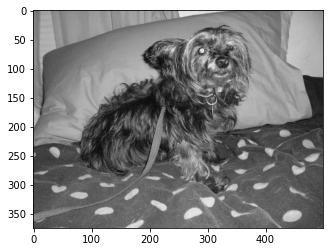

In [34]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        
        break
    break

Lets see the data

In [35]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


And the size

In [36]:
print(img_array.shape)

(375, 500)


We don't want the images that big, but also various images are different shapes, and this is also a problem. So lets fix that

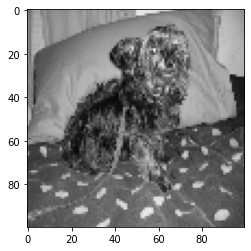

In [37]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Bit blurry, but good enough for our classification

Next, we're going to create training data, but first, we should set aside some images for final testing.  
We'll just manually create a directory called Testing and then create 2 directories inside of there, one for Dog and one for Cat. From here, we will just move the first 15 images from both Dog and Cat into the training versions.  
Make sure to move them, not copy. We will use this for our final tests.

## Get the Training data ready
Now, we will reuse the above code for training data
- we want to add classification label to our data
- we will add `try - except` block for ignoring invalid data

In [38]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        

In [39]:
create_training_data()

In [40]:
print(len(training_data))

24916


We have almost 25K samples!

One thing we want to do is make sure our data is balanced i.e. same number of examples for each class (same number of dogs and cats). If not balanced, you either want to pass the class weights to the model, so that it can measure error appropriately, or balance your samples by trimming the larger set to be the same size as the smaller set. (In this case, the dataset is quite balanced).  

If you do not balance, the model will initially learn that the best thing to do is predict only one class, whichever is the most common. Then, it will often get stuck here.  

Next, we want to shuffle the data. Right now our data is just all dogs, then all cats. This will usually wind up causing trouble too, as, initially, the classifier will learn to just predict dogs always. Then it will shift to just predict all cats!

In [41]:
import random

random.shuffle(training_data)

# Lets check by printing labels
print([sample[1] for sample in training_data[:10]])

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


Now finally, we will extract the features and labels

In [42]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

# converting the features and labels to numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

Lets save this data for future use

In [43]:
import pickle

with open("data_model/X.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)
    
with open("data_model/y.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)    